# Introduction to Neural Net

by: **Rodrigo Hernández Mota**
    
The _neural net_ package...

In [1]:
%matplotlib inline

from neural_net import *

To create the data the following packages will be needed: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Adaline 

Simple neuron with a linear regression as an activation function. 


We begin by creating a sample dataset: 

In [53]:
# create dataset
x_d = pd.DataFrame({'x1':np.arange(100)})
y_d = pd.DataFrame({'y':x_d.apply(lambda x: x[0] * np.random.rand(1)[0] + 0.01 * x[0] ** 2 + 10 * np.random.rand(1)[0], axis = 1)})

Now we initialize, train and evaluate the neuron.

In [54]:
# initialize, train and evaluate
neuron = adaline(x_data = x_d, y_data = y_d) 
neuron.train()
neuron.evaluate()

Proceed to plot the resutls. 

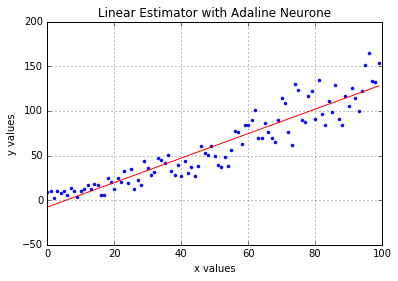

In [59]:
# plot results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(neuron.x_data, neuron.y_data,'b.',
         neuron.x_data, neuron.y_estimate, 'r-')
plt.title('Linear Estimator with Adaline Neurone')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.show()

Modify the input data to obtain a non-linear estimation.

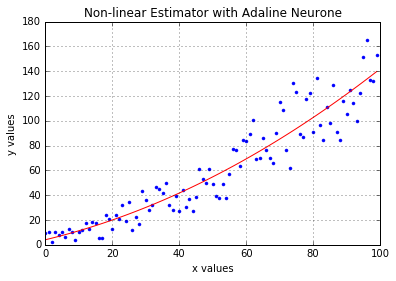

In [60]:
x_d2 = x_d.copy()
x_d2['x2'] = x_d2['x1'].apply(lambda x: x**2)

neuron_2 = adaline(x_data = x_d2, y_data = y_d) 
neuron_2.train()
neuron_2.evaluate()

plt.figure()
plt.plot(neuron.x_data, neuron_2.y_data,'b.',
         neuron.x_data, neuron_2.y_estimate, 'r-')
plt.title('Non-linear Estimator with Adaline Neurone')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.show()

## Logistic regression 

[...]

Sample dataset:

In [3]:
# read dataset
data = pd.read_csv('data_1.csv',header=None)
data = data.rename(columns = {data.columns[0]:'x1',data.columns[1]:'x2',data.columns[2]:'y'})
x_d = data[data.columns[:-1]]
y_d = data[data.columns[-1]]

x1 = x_d[data.columns[0]].values
x2 = x_d[data.columns[1]].values
mask = y_d.values

data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Initialize, train and evaluate function.

In [4]:
neuron = simple_logistic(x_data = x_d, y_data = y_d)
neuron.train()
neuron.evaluate()


C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: divide by zero encountered in log
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))
C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: invalid value encountered in multiply
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))


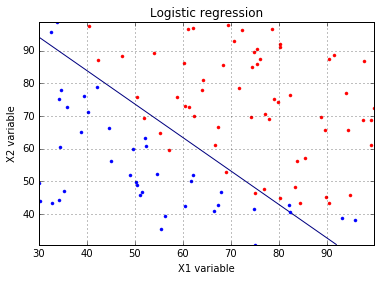

In [5]:
# plot the results 
mask = np.array(list(map(bool, mask)))
g_x1 = np.linspace(min(x1), max(x1), 100)
g_x2 = np.linspace(min(x2), max(x2), 100)
mg1, mg2 = np.meshgrid(g_x1, g_x2)
r, c = np.shape(mg1)

gx1 = np.reshape(mg1, (r*c,))
gx2 = np.reshape(mg2, (r*c,))

pl_x = pd.DataFrame({'gx1':gx1, 'gx2':gx2})
pl_x
neuron.evaluate(x = pl_x)

y_est = np.reshape(neuron.probability.values, (r,c))

plt.figure()
plt.plot(x_d.iloc[mask].x1,x_d.iloc[mask].x2, 'r.',x_d.iloc[mask == False].x1,x_d.iloc[mask == False].x2, 'b.' )
plt.contour(g_x1,g_x2,y_est, 1)
plt.title('Logistic regression')
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.grid()
plt.show()


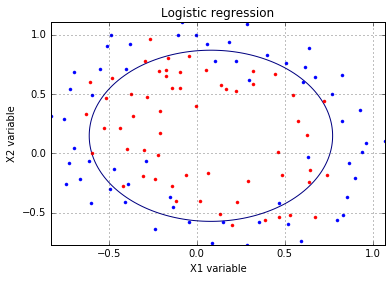

In [6]:
# read data 
data = pd.read_csv('data_2.csv',header=None)
data = data.rename(columns = {data.columns[0]:'x1',data.columns[1]:'x2',data.columns[2]:'y'})
x_d = data[data.columns[:-1]]
y_d = data[data.columns[-1]]

x1 = x_d[data.columns[0]].values
x2 = x_d[data.columns[1]].values
mask = y_d.values

data.head()

# feed the model with polyn features

x_d['x1_2'] = x_d['x1'].apply(lambda x: x ** 2)
x_d['x2_2'] = x_d['x2'].apply(lambda x: x ** 2)

neuron2 = simple_logistic(x_data = x_d, y_data = y_d)
neuron2.train()
neuron2.evaluate()


# plot the results 
mask = np.array(list(map(bool, mask)))
g_x1 = np.linspace(min(x1), max(x1), 100)
g_x2 = np.linspace(min(x2), max(x2), 100)
mg1, mg2 = np.meshgrid(g_x1, g_x2)
r, c = np.shape(mg1)

gx1 = np.reshape(mg1, (r*c,))
gx2 = np.reshape(mg2, (r*c,))

pl_x = pd.DataFrame({'gx1':gx1, 'gx2':gx2})
pl_x['x1_2'] = pl_x['gx1'].apply(lambda x: x ** 2)
pl_x['x2_2'] = pl_x['gx2'].apply(lambda x: x ** 2)

neuron2.evaluate(x = pl_x)

y_est = np.reshape(neuron2.probability.values, (r,c))

plt.figure()
plt.plot(x_d.iloc[mask].x1,x_d.iloc[mask].x2, 'r.',x_d.iloc[mask == False].x1,x_d.iloc[mask == False].x2, 'b.' )
plt.contour(g_x1,g_x2,y_est, 1)
plt.title('Logistic regression')
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.grid()
plt.show()

## Parallel logistic 

## Competitive Neurons

Use competitive neurons as an unsupervised method to detect clusters in a dataset. 

,0,1,2
0,9.691543,11.663965,10.328997
1,8.376917,8.004604,10.162957
2,10.394095,9.849797,11.479764
3,9.883697,9.697396,9.059116
4,10.783797,9.843665,9.272296


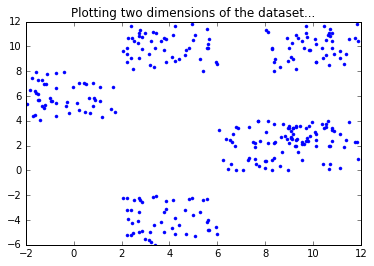

In [3]:
# read dataset 
from scipy.io import loadmat
m = loadmat('datos2.mat')
m = m['datos2']
data = pd.DataFrame(m.T)

d = data.values.T
plt.plot(d[0], d[1], '.')
plt.title('Plotting two dimensions of the dataset...')

data.head()

In [4]:
# initialize, train and evaluate object 
cn = competitive_neurons(neurons = 10, x_data = data)
cn.train()
cn.evaluate()


Neurons that found a cluster: [2 5 6 7 8 9]


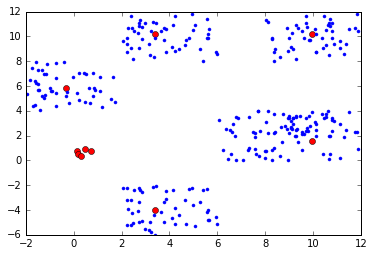

In [14]:
# print results 
neurons = np.unique(cn.y)
print('Neurons that found a cluster: {}'.format(neurons))

# plot results 
for i in cn.w.columns:
    temp = cn.w[i]
    plt.plot(temp.values[0], temp.values[1],'ro')
plt.plot(d[0], d[1], '.')
plt.show()

## Multilayer Perceptron


...

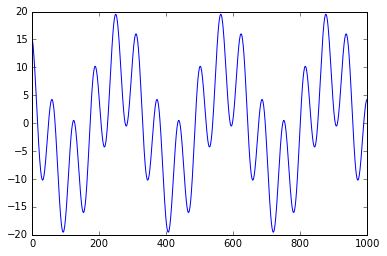

In [23]:
# create dataset
x1 = np.linspace(-10,10,1000)
x2 = 5*np.linspace(-10,10,1000)

y = 10 * np.sin(x1) + 10 * np.cos(x2)

x_d = pd.DataFrame({'x1':x1,'x2':x2})
y_d = pd.DataFrame({'y':y})

plt.plot(y_d)